<a href="https://colab.research.google.com/github/palomadevfullstack/movie-profitability-analysis/blob/main/Movie_Profitability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dois datasets
try:
    movies_df = pd.read_csv('tmdb_5000_movies.csv')
    credits_df = pd.read_csv('tmdb_5000_credits.csv')

    print("✅ Datasets carregados com sucesso!")

    # Dando uma primeira olhada no dataset de filmes
    print("\n--- Informações sobre o dataset de FILMES ---")
    print(movies_df.info())
    print("\n--- 5 primeiras linhas do dataset de FILMES ---")
    print(movies_df.head())

    # Dando uma primeira olhada no dataset de créditos
    print("\n--- Informações sobre o dataset de CRÉDITOS ---")
    print(credits_df.info())
    print("\n--- 5 primeiras linhas do dataset de CRÉDITOS ---")
    print(credits_df.head())

except FileNotFoundError:
    print("❌ Erro: Arquivos não encontrados. Verifique se você fez o upload do 'tmdb_5000_movies.csv' e 'tmdb_5000_credits.csv'.")

✅ Datasets carregados com sucesso!

--- Informações sobre o dataset de FILMES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   flo

In [2]:
# Unindo os dois DataFrames
# 'left_on' indica a chave no DataFrame da esquerda (movies_df)
# 'right_on' indica a chave no DataFrame da direita (credits_df)
df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id')

# Após a junção, teremos colunas redundantes. Vamos removê-las.
# 'movie_id' é igual a 'id'
# 'title_y' (do arq. de créditos) é igual a 'title_x' (do arq. de filmes)
df.drop(columns=['movie_id', 'title_y'], inplace=True)

# Vamos renomear a coluna 'title_x' para apenas 'title' para ficar mais limpo
df.rename(columns={'title_x': 'title'}, inplace=True)


# Verificando o resultado da junção
print("✅ DataFrames unidos com sucesso!")
print(f"O novo DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

print("\n--- Verificando as 5 primeiras linhas do DataFrame combinado ---")
print(df.head())

print("\n--- Verificando as colunas e tipos de dados ---")
df.info()

✅ DataFrames unidos com sucesso!
O novo DataFrame tem 1962 linhas e 22 colunas.

--- Verificando as 5 primeiras linhas do DataFrame combinado ---
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name

# Um maior orçamento (budget) leva a uma maior receita (revenue)?

Dataset original tinha 1962 filmes.
Após a limpeza, restaram 1728 filmes com dados de orçamento e receita.

Gerando o gráfico de dispersão...


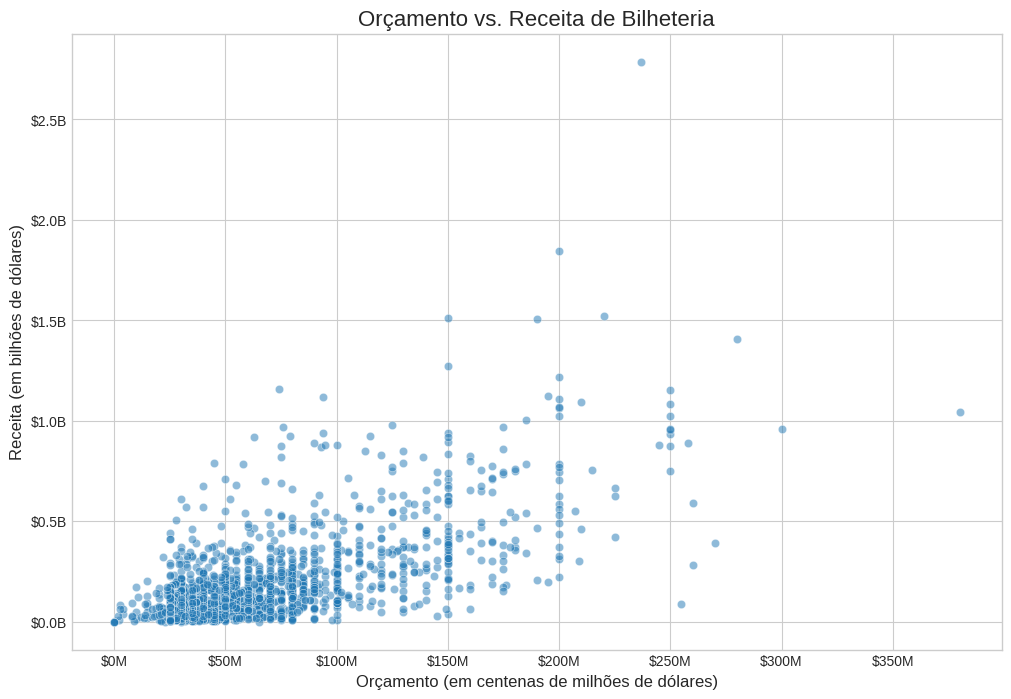


--- Análise de Correlação ---
O coeficiente de correlação entre Orçamento e Receita é: 0.67
Conclusão: Existe uma correlação positiva moderada.


In [4]:
# --- Passo 1: Limpeza dos Dados ---
# Vamos criar um novo DataFrame apenas com os filmes que têm orçamento E receita maiores que zero.
df_clean = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

print(f"Dataset original tinha {len(df)} filmes.")
print(f"Após a limpeza, restaram {len(df_clean)} filmes com dados de orçamento e receita.")


# --- Passo 2: Visualização com Gráfico de Dispersão ---
print("\nGerando o gráfico de dispersão...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Criando o scatter plot
ax = sns.scatterplot(data=df_clean, x='budget', y='revenue', alpha=0.5)

# Adicionando Título e Rótulos
plt.title('Orçamento vs. Receita de Bilheteria', fontsize=16)
plt.xlabel('Orçamento (em centenas de milhões de dólares)', fontsize=12)
plt.ylabel('Receita (em bilhões de dólares)', fontsize=12)

# Formatando os eixos para facilitar a leitura
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000:.0f}M')
ax.yaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000_000:.1f}B')

plt.show()


# --- Passo 3: Análise Estatística (Correlação) ---
correlation = df_clean['budget'].corr(df_clean['revenue'])
print("\n--- Análise de Correlação ---")
print(f"O coeficiente de correlação entre Orçamento e Receita é: {correlation:.2f}")

if correlation > 0.7:
    print("Conclusão: Existe uma forte correlação positiva. Filmes com maior orçamento tendem a ter maior receita.")
elif correlation > 0.4:
    print("Conclusão: Existe uma correlação positiva moderada.")
else:
    print("Conclusão: A correlação é fraca ou inexistente.")

# Quais foram os 10 filmes mais lucrativos da história?

✅ Coluna 'profit' (lucro) criada com sucesso.

--- 🎬 Top 10 Filmes Mais Lucrativos ---
                                             title          profit  \
0                                           Avatar  $2,550,965,087   
25                                         Titanic  $1,645,034,188   
28                                  Jurassic World  $1,363,528,810   
44                                       Furious 7  $1,316,249,360   
16                                    The Avengers  $1,299,557,910   
7                          Avengers: Age of Ultron  $1,125,403,694   
124                                         Frozen  $1,124,219,009   
546                                        Minions  $1,082,730,962   
329  The Lord of the Rings: The Return of the King  $1,024,888,979   
31                                      Iron Man 3  $1,015,439,994   

           budget         revenue  
0    $237,000,000  $2,787,965,087  
25   $200,000,000  $1,845,034,188  
28   $150,000,000  $1,513,528,810 

/tmp/ipython-input-926235807.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='profit', y='title', data=top_10_profit, palette='viridis', orient='h')


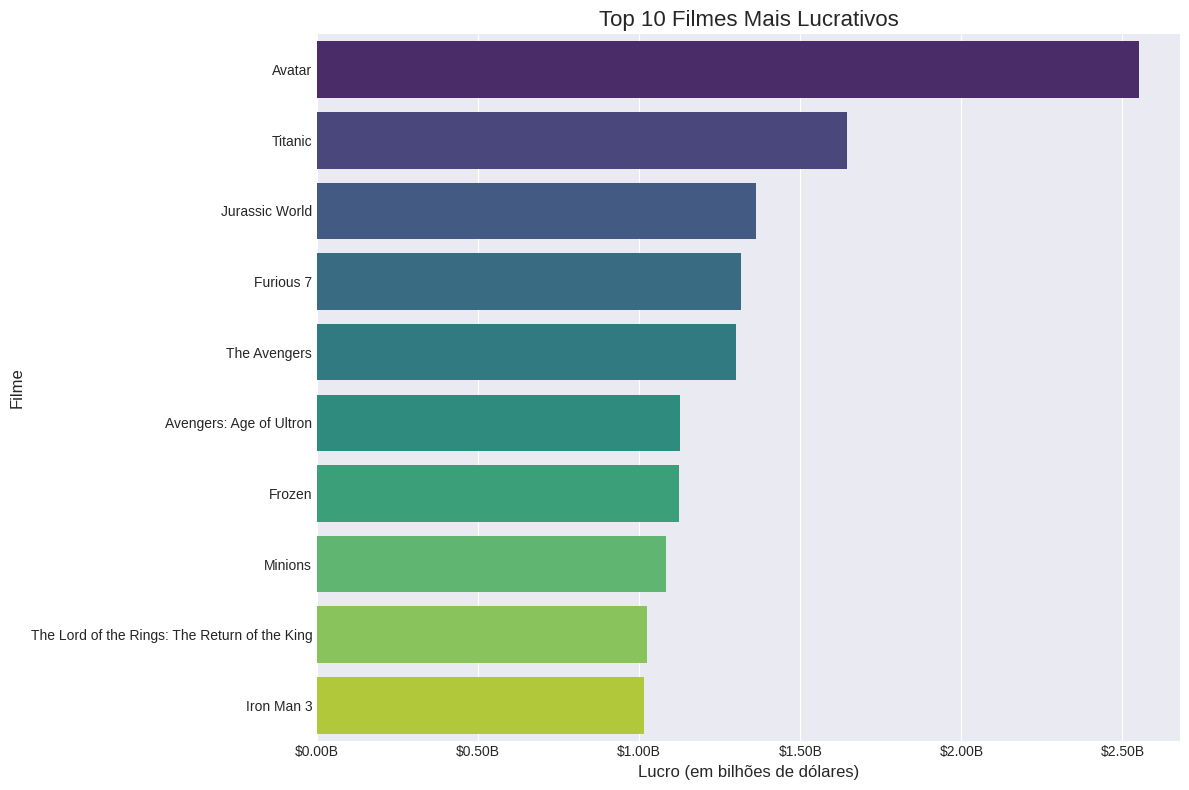

In [7]:
# --- Passo 1: Engenharia de Feature - Criar a coluna 'profit' ---
# Usamos o df_clean que já remove os filmes com orçamento/receita zerados.
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']
print("✅ Coluna 'profit' (lucro) criada com sucesso.")


# --- Passo 2: Encontrar os filmes mais lucrativos ---
# Ordenamos o DataFrame pela coluna 'profit' em ordem decrescente e pegamos os 10 primeiros
top_10_profit = df_clean.sort_values(by='profit', ascending=False).head(10)


# --- Passo 3: Exibir o resultado em texto ---
# Para uma visualização mais limpa, vamos mostrar apenas as colunas de interesse
# e formatar os números para facilitar a leitura.
display_cols = ['title', 'profit', 'budget', 'revenue']

# Função para formatar os números como moeda (Dólar)
def format_currency(amount):
    return "${:,.0f}".format(amount)

# Aplicando a formatação para exibição
top_10_profit_display = top_10_profit[display_cols].copy()
for col in ['profit', 'budget', 'revenue']:
    top_10_profit_display[col] = top_10_profit_display[col].apply(format_currency)


print("\n--- 🎬 Top 10 Filmes Mais Lucrativos ---")
print(top_10_profit_display)


# --- Passo 4: Visualização com Gráfico de Barras ---
print("\nGerando o gráfico dos 10 filmes mais lucrativos...")

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras horizontal
ax = sns.barplot(x='profit', y='title', data=top_10_profit, palette='viridis', orient='h')

# Adicionando Título e Rótulos
plt.title('Top 10 Filmes Mais Lucrativos', fontsize=16)
plt.xlabel('Lucro (em bilhões de dólares)', fontsize=12)
plt.ylabel('Filme', fontsize=12)

# Formatando o eixo X para exibir os valores em bilhões
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000_000:.2f}B')

plt.tight_layout()
plt.show()

# Quais são os gêneros de filmes mais lucrativos e os mais produzidos em geral?

✅ Coluna 'genre_list' com a lista de gêneros criada com sucesso.
✅ DataFrame 'explodido' por gênero criado. Agora cada filme tem uma linha por gênero.

--- 🎭 Top 10 Gêneros Mais Produzidos ---
genre_list
Action             673
Drama              649
Comedy             580
Thriller           546
Adventure          517
Science Fiction    295
Crime              286
Family             279
Fantasy            264
Romance            253
Name: count, dtype: int64


/tmp/ipython-input-3064529695.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_frequent_genres.values, y=top_10_frequent_genres.index, palette='mako')


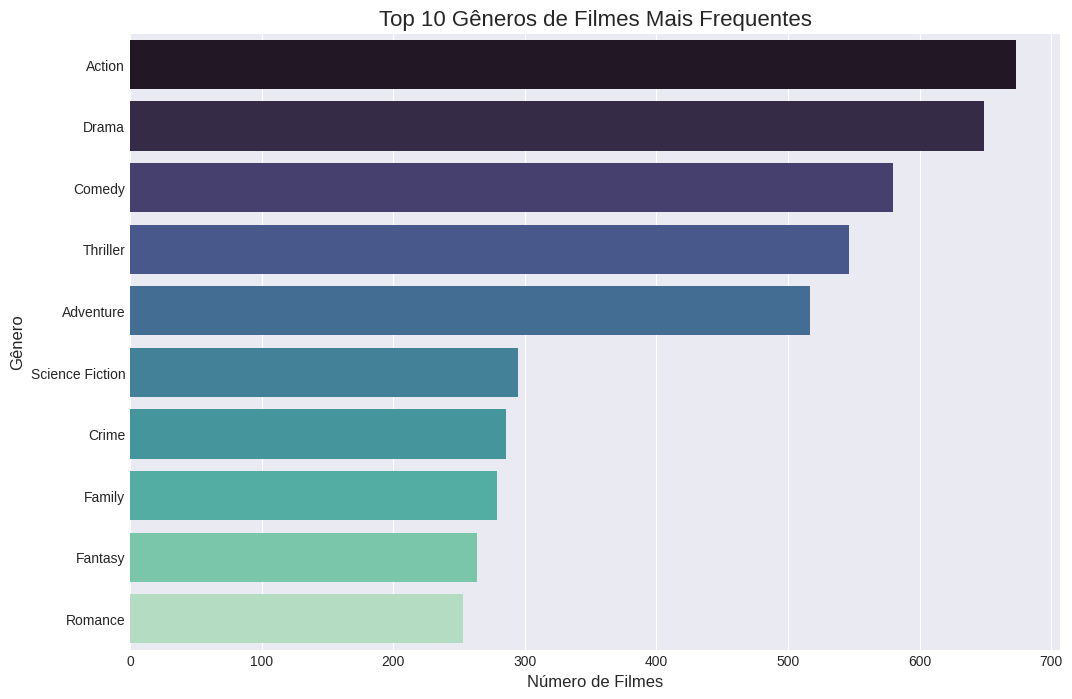


--- 💰 Lucro Médio por Gênero ---
genre_list
Animation          $226,173,326
Adventure          $201,649,147
Fantasy            $195,164,261
Family             $186,536,220
Science Fiction    $167,004,308
Action             $144,543,510
Comedy             $107,404,007
Music              $105,018,433
Romance            $100,857,763
Thriller            $95,770,527
Mystery             $88,337,236
Drama               $81,931,242
Crime               $74,636,437
War                 $73,900,769
Horror              $57,203,575
History             $46,958,618
Western             $35,553,032
Documentary        $-15,649,317
Name: profit, dtype: object


/tmp/ipython-input-3064529695.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_profit_by_genre.values, y=avg_profit_by_genre.index, palette='magma')


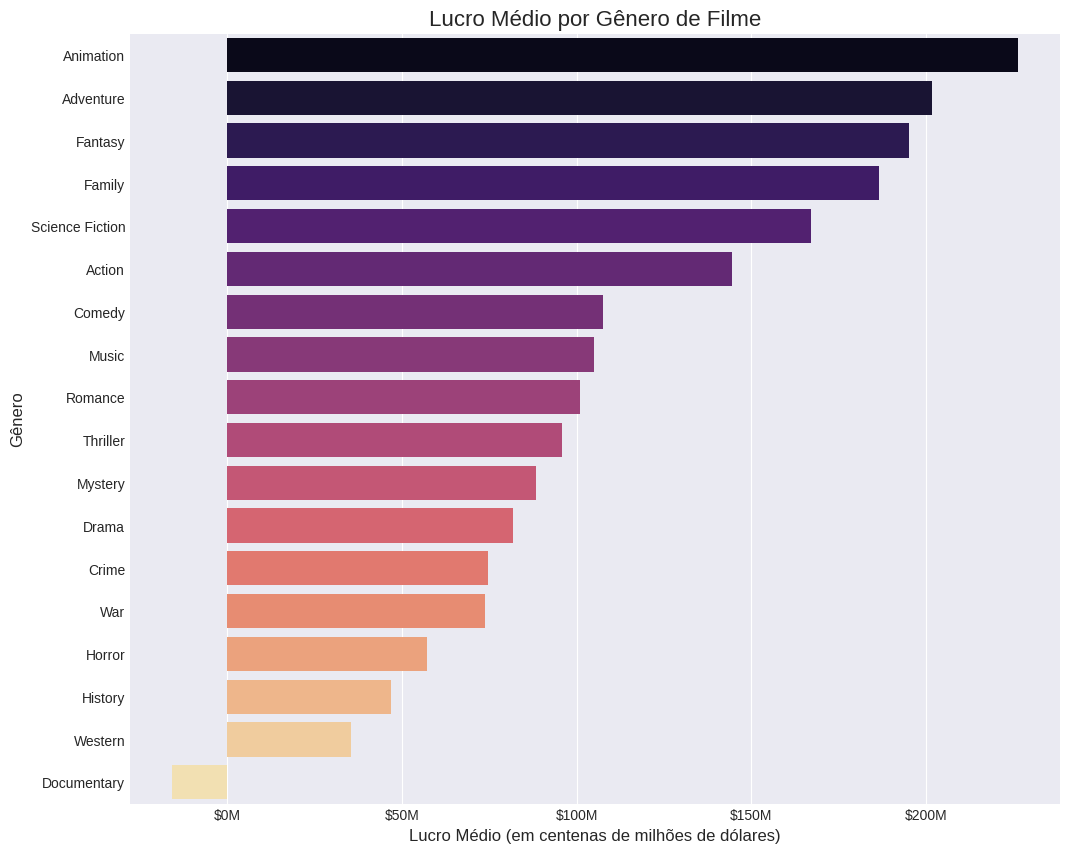

In [8]:
import ast # Biblioteca para converter o texto JSON de forma segura

# --- Passo 1: Limpeza e Preparação da Coluna de Gêneros ---

# A coluna 'genres' é uma string que parece uma lista de dicionários.
# Criar uma função para extrair apenas os nomes dos gêneros.
def extract_genres(text):
    try:
        # ast.literal_eval converte a string para uma lista de dicionários
        genres_list = ast.literal_eval(text)
        # Extrair apenas o valor da chave 'name' para cada dicionário na lista
        return [genre['name'] for genre in genres_list]
    except (ValueError, SyntaxError):
        # Se houver algum erro na conversão, retorna uma lista vazia
        return []

# Aplicar a função na coluna 'genres' para criar uma nova coluna com a lista de nomes
df_clean['genre_list'] = df_clean['genres'].apply(extract_genres)
print("✅ Coluna 'genre_list' com a lista de gêneros criada com sucesso.")


# --- Passo 2: "Explodir" o DataFrame ---
# A função .explode() transforma cada item de uma lista em uma nova linha
genres_df = df_clean.explode('genre_list')
print("✅ DataFrame 'explodido' por gênero criado. Agora cada filme tem uma linha por gênero.")


# --- Passo 3.1: Análise de FREQUÊNCIA dos Gêneros ---
top_10_frequent_genres = genres_df['genre_list'].value_counts().head(10)

print("\n--- 🎭 Top 10 Gêneros Mais Produzidos ---")
print(top_10_frequent_genres)

# Visualização
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_frequent_genres.values, y=top_10_frequent_genres.index, palette='mako')
plt.title('Top 10 Gêneros de Filmes Mais Frequentes', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()


# --- Passo 3.2: Análise de RENTABILIDADE (Lucro Médio) por Gênero ---
# groupby() para calcular o lucro médio de cada gênero
avg_profit_by_genre = genres_df.groupby('genre_list')['profit'].mean().sort_values(ascending=False)

print("\n--- 💰 Lucro Médio por Gênero ---")
print(avg_profit_by_genre.apply(lambda x: "${:,.0f}".format(x)))

# Visualização
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=avg_profit_by_genre.values, y=avg_profit_by_genre.index, palette='magma')
plt.title('Lucro Médio por Gênero de Filme', fontsize=16)
plt.xlabel('Lucro Médio (em centenas de milhões de dólares)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000:.0f}M')
plt.show()

# Quais são os atores e diretores mais lucrativos?

✅ Coluna 'director' criada com sucesso.

--- 🎬 Top 10 Diretores Mais Lucrativos (Lucro Total Gerado) ---
                      Lucro Total  Nº de Filmes
director                                       
Steven Spielberg   $5,427,371,076            21
Peter Jackson      $5,207,593,685             8
James Cameron      $4,899,881,784             5
Michael Bay        $4,300,117,614            11
Christopher Nolan  $3,191,760,138             7
Joss Whedon        $2,424,831,068             3
Francis Lawrence   $2,349,457,182             5
Chris Columbus     $2,316,955,147             7
Tim Burton         $2,242,320,607            10
Sam Raimi          $2,238,578,418             6


/tmp/ipython-input-2303020043.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_directors['sum_formatted'] = top_10_directors['sum'].apply(lambda x: "${:,.0f}".format(x))
/tmp/ipython-input-2303020043.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sum', y=top_10_directors.index, data=top_10_directors, palette='crest')


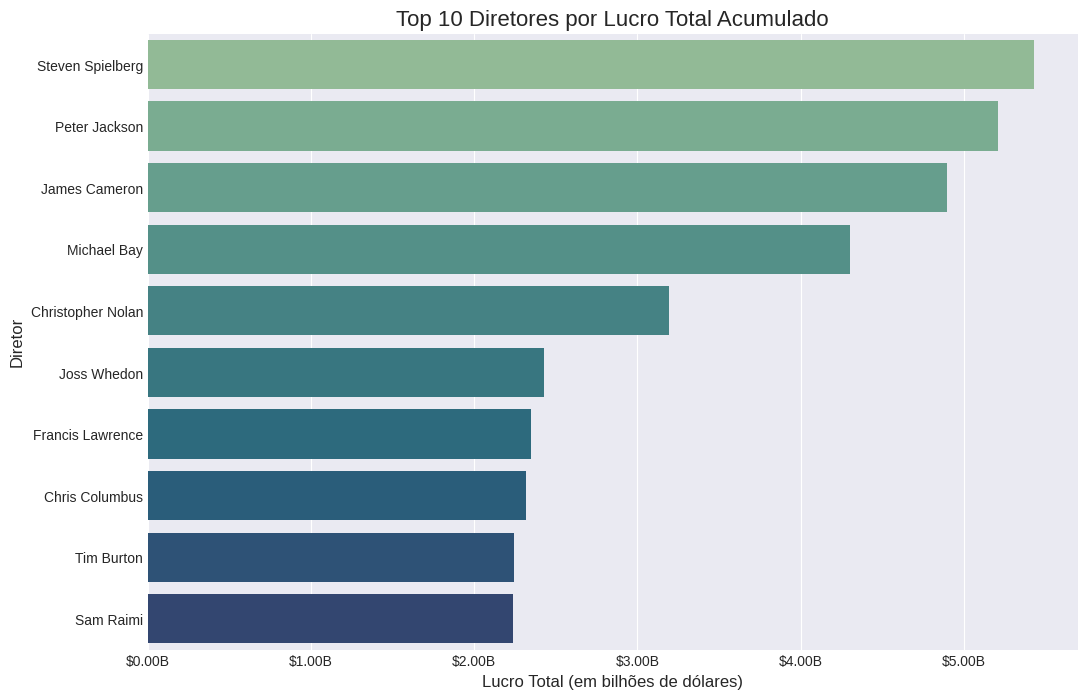

In [9]:
import ast

# --- Passo 1: Extrair o nome do Diretor ---

def get_director(crew_data):
    try:
        # Converte a string em uma lista de dicionários
        crew_list = ast.literal_eval(crew_data)
        # Itera pela lista da equipe
        for member in crew_list:
            # Se o cargo (job) for 'Director', retorna o nome
            if member['job'] == 'Director':
                return member['name']
        # Se não encontrar um diretor, retorna Nulo
        return None
    except:
        return None

# Aplicamos a função para criar a nova coluna 'director'
df_clean['director'] = df_clean['crew'].apply(get_director)
print("✅ Coluna 'director' criada com sucesso.")


# --- Passo 2: Análise de Lucratividade por Diretor ---

# Vamos remover os filmes que não têm diretor listado para esta análise
directors_df = df_clean.dropna(subset=['director'])

# Agrupamos por diretor e calculamos o LUCRO TOTAL (soma) e a QUANTIDADE de filmes
director_profit = directors_df.groupby('director')['profit'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)

# Vamos focar em diretores com mais de um filme no dataset para uma análise mais robusta
director_profit_filtered = director_profit[director_profit['count'] > 1]


# --- Passo 3: Exibir e Visualizar o Resultado ---

print("\n--- 🎬 Top 10 Diretores Mais Lucrativos (Lucro Total Gerado) ---")
# Formatando a coluna de lucro para melhor leitura
top_10_directors = director_profit_filtered.head(10)
top_10_directors['sum_formatted'] = top_10_directors['sum'].apply(lambda x: "${:,.0f}".format(x))
print(top_10_directors[['sum_formatted', 'count']].rename(columns={'sum_formatted': 'Lucro Total', 'count': 'Nº de Filmes'}))


# Visualização
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='sum', y=top_10_directors.index, data=top_10_directors, palette='crest')

plt.title('Top 10 Diretores por Lucro Total Acumulado', fontsize=16)
plt.xlabel('Lucro Total (em bilhões de dólares)', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000_000:.2f}B')
plt.show()

✅ Coluna 'main_actor' criada com sucesso.

--- ⭐ Top 10 Atores Mais Lucrativos (Lucro Total Gerado) ---
                      Lucro Total  Nº de Filmes
main_actor                                     
Tom Hanks          $5,268,277,630            20
Tom Cruise         $5,087,311,845            20
Robert Downey Jr.  $5,071,653,812             9
Daniel Radcliffe   $4,506,061,557             6
Will Smith         $4,115,924,861            15
Ben Stiller        $3,675,107,299            19
Johnny Depp        $3,661,163,088            22
Elijah Wood        $2,919,488,814             7
Mike Myers         $2,912,221,589             7
Bruce Willis       $2,823,959,751            24


/tmp/ipython-input-4267791588.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_actors['sum_formatted'] = top_10_actors['sum'].apply(lambda x: "${:,.0f}".format(x))
/tmp/ipython-input-4267791588.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sum', y=top_10_actors.index, data=top_10_actors, palette='plasma')


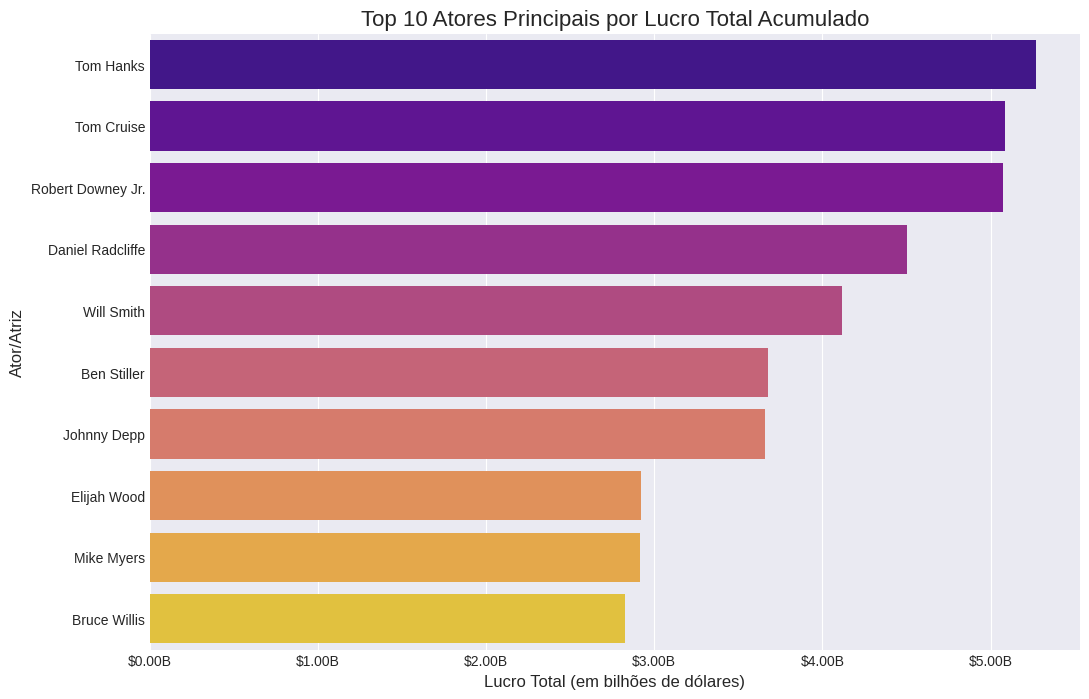

In [10]:
import ast

# --- Passo 1: Extrair o nome do Ator Principal ---

def get_main_actor(cast_data):
    try:
        # Converte a string em uma lista de dicionários
        cast_list = ast.literal_eval(cast_data)
        if cast_list:
            # Se a lista não estiver vazia, retorna o nome do primeiro ator
            return cast_list[0]['name']
        return None
    except:
        return None

# Aplicamos a função para criar a nova coluna 'main_actor'
df_clean['main_actor'] = df_clean['cast'].apply(get_main_actor)
print("✅ Coluna 'main_actor' criada com sucesso.")


# --- Passo 2: Análise de Lucratividade por Ator Principal ---

# Remove os filmes sem ator principal listado
actors_df = df_clean.dropna(subset=['main_actor'])

# Agrupa por ator e calcula o lucro total (soma) e a quantidade de filmes
actor_profit = actors_df.groupby('main_actor')['profit'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)

# Filtra para atores com mais de um filme no dataset
actor_profit_filtered = actor_profit[actor_profit['count'] > 1]


# --- Passo 3: Exibir e Visualizar o Resultado ---

print("\n--- ⭐ Top 10 Atores Mais Lucrativos (Lucro Total Gerado) ---")
top_10_actors = actor_profit_filtered.head(10)
top_10_actors['sum_formatted'] = top_10_actors['sum'].apply(lambda x: "${:,.0f}".format(x))
print(top_10_actors[['sum_formatted', 'count']].rename(columns={'sum_formatted': 'Lucro Total', 'count': 'Nº de Filmes'}))


# Visualização
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='sum', y=top_10_actors.index, data=top_10_actors, palette='plasma')

plt.title('Top 10 Atores Principais por Lucro Total Acumulado', fontsize=16)
plt.xlabel('Lucro Total (em bilhões de dólares)', fontsize=12)
plt.ylabel('Ator/Atriz', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000_000:.2f}B')
plt.show()

✅ Colunas 'main_actor_name' e 'main_actor_gender' criadas.
Encontramos 340 filmes protagonizados por atrizes em nosso dataset limpo.

--- ⭐ Top 10 Atrizes Mais Lucrativas (Lucro Total Gerado) ---
                      Lucro Total  Nº de Filmes
main_actor_name                                
Kristen Stewart    $2,581,535,434             5
Sandra Bullock     $2,529,643,956            11
Jennifer Lawrence  $2,495,296,693             5
Kate Winslet       $1,728,656,547             3
Meryl Streep       $1,580,834,053            10
Angelina Jolie     $1,562,850,360             9
Julia Roberts      $1,537,853,230            11
Cameron Diaz         $797,745,911             9
Milla Jovovich       $738,500,113             8
Helen Hunt           $706,583,231             2


/tmp/ipython-input-4007341550.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_actresses['sum_formatted'] = top_10_actresses['sum'].apply(lambda x: "${:,.0f}".format(x))
/tmp/ipython-input-4007341550.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sum', y=top_10_actresses.index, data=top_10_actresses, palette='rocket')


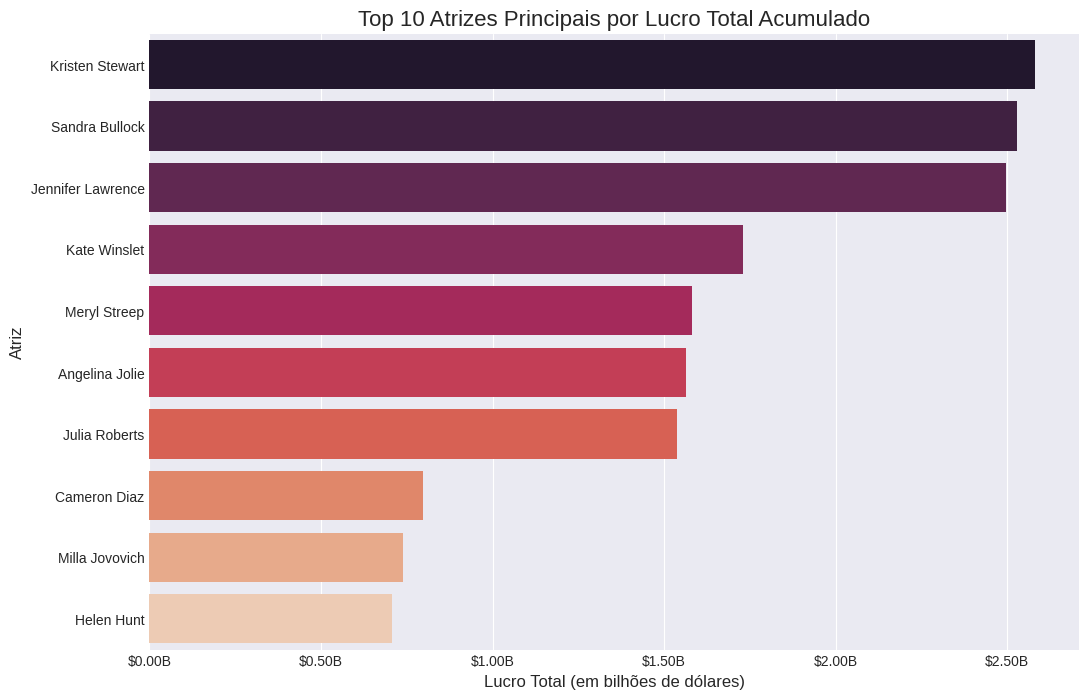

In [11]:
import ast

# --- Passo 1: Extrair Ator/Atriz Principal e Gênero ---

def get_main_actor_and_gender(cast_data):
    try:
        cast_list = ast.literal_eval(cast_data)
        if cast_list:
            # Retorna o nome e o gênero da primeira pessoa da lista
            return cast_list[0]['name'], cast_list[0]['gender']
        return None, None
    except:
        return None, None

# Aplicando a função e criando DUAS novas colunas de uma vez
# Isso cria uma coluna temporária de tuplas (nome, gênero) e as expande
df_clean[['main_actor_name', 'main_actor_gender']] = df_clean['cast'].apply(
    lambda x: pd.Series(get_main_actor_and_gender(x))
)
print("✅ Colunas 'main_actor_name' e 'main_actor_gender' criadas.")


# --- Passo 2: Filtrar apenas para Atrizes ---

# Onde gênero é 1, temos uma atriz.
# Também removemos qualquer linha onde os dados não foram extraídos corretamente.
actresses_df = df_clean[(df_clean['main_actor_gender'] == 1)].copy()
print(f"Encontramos {len(actresses_df)} filmes protagonizados por atrizes em nosso dataset limpo.")


# --- Passo 3: Análise de Lucratividade por Atriz ---

# Agrupamos por atriz e calculamos o lucro total e a quantidade de filmes
actress_profit = actresses_df.groupby('main_actor_name')['profit'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)

# Filtramos para atrizes com mais de um filme no dataset
actress_profit_filtered = actress_profit[actress_profit['count'] > 1]


# --- Passo 4: Exibir e Visualizar o Resultado ---

print("\n--- ⭐ Top 10 Atrizes Mais Lucrativas (Lucro Total Gerado) ---")
top_10_actresses = actress_profit_filtered.head(10)
top_10_actresses['sum_formatted'] = top_10_actresses['sum'].apply(lambda x: "${:,.0f}".format(x))
print(top_10_actresses[['sum_formatted', 'count']].rename(columns={'sum_formatted': 'Lucro Total', 'count': 'Nº de Filmes'}))


# Visualização
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='sum', y=top_10_actresses.index, data=top_10_actresses, palette='rocket')

plt.title('Top 10 Atrizes Principais por Lucro Total Acumulado', fontsize=16)
plt.xlabel('Lucro Total (em bilhões de dólares)', fontsize=12)
plt.ylabel('Atriz', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1_000_000_000:.2f}B')
plt.show()